In [65]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_pct'] = ((df['Adj. High'] - df['Adj. Low'])/df['Adj. Low']) * 100
df['PCT_Change'] = ((df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']) * 100

df = df[['Adj. Close', 'HL_pct', 'PCT_Change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_pct  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


/var/folders/lt/3s8bbpzn5mg9th5vt5lsn0_80000gn/T/ipykernel_32386/298695702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HL_pct'] = ((df['Adj. High'] - df['Adj. Low'])/df['Adj. Low']) * 100
/var/folders/lt/3s8bbpzn5mg9th5vt5lsn0_80000gn/T/ipykernel_32386/298695702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCT_Change'] = ((df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']) * 100


In [53]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True) #-99999 so that it will be treated as an outlier in the data

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)


print(df.head())

            Adj. Close    HL_pct  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.639972
2004-08-20   54.322689  8.537313    7.227007   22834300.0  69.078238
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  67.839414
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  68.912727
2004-08-25   53.164113  3.966115    1.183658    9188600.0  70.668146


In [63]:
X = np.array(df.drop(['label'],1)) 
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])



print(len(X), len(y))

3287 3321


/var/folders/lt/3s8bbpzn5mg9th5vt5lsn0_80000gn/T/ipykernel_32386/352754930.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [60]:
print(accuracy)

0.9745037245541465


In [30]:
clf1 = svm.SVR()
clf1.fit(X_train, y_train)
accuracy = clf1.score(X_test, y_test)
print(accuracy)

0.8082892097501673


In [61]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 959.0321163   960.84561142  964.44263093  968.67493222  957.76285731
  952.66350118  947.12723456  954.6039391   965.21465854  965.06515891
  961.23514783  951.21506499  955.20758107  976.7224205   982.94585514
  991.81094193  984.71977152  990.34179123  984.91235364 1003.00195878
 1011.64356683 1010.62427022 1005.3017679  1023.40929959 1023.93888536
 1026.41096464 1027.75743617 1029.70780847 1031.11596009 1019.97161005
 1023.60099507 1002.03954867 1006.50747565 1009.19335828] 0.9745037245541465 34


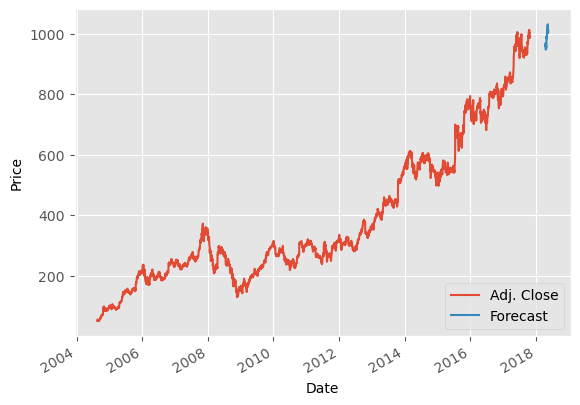

<Figure size 1500x200 with 0 Axes>

In [71]:
df['Forecast'] = np.nan

last_Date = df.iloc[-1].name
last_unix = last_Date.timestamp()
one_day = 86400 #how many seconds are in a day
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(15,2))
plt.show()